In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import folium # Créer des cartes interactives avec Leaflet.js
from folium.plugins import MarkerCluster # plugin Folium qui regroupe plusieurs points proches en un groupe clickable
import ipywidgets as widgets
from ipywidgets import interact # permet d’ajouter un menu déroulant interactif dans Jupyter.
from IPython.display import display # pour afficher explicitement un objet carte dans le notebook.

In [2]:
csv_path= '/home/karim/code/offre_culturelle/data/adresses_des_bibliotheques_publiques_prepared.csv' # Chemin vers le fichier CSV
if os.path.exists(csv_path):
    print(f"Le fichier {csv_path} existe.")
    adresses_des_bibliotheques_publiques = pd.read_csv(csv_path, sep=',')
else:
    print(f"Le fichier {csv_path} n'existe pas.")

Le fichier /home/karim/code/offre_culturelle/data/adresses_des_bibliotheques_publiques_prepared.csv existe.


In [3]:
print(adresses_des_bibliotheques_publiques.head()) # 5 rows x 46 columns
print(adresses_des_bibliotheques_publiques.info()) # 15 704 données - dtypes: float64(26), object(20)
print(adresses_des_bibliotheques_publiques.describe())

  Code_bib                     nom_de_l_etablissement  \
0    BD101               03 - MDA annexe de Commentry   
1   BD1034  27 - MEDIATHEQUE DEPARTEMENTALE DE L'EURE   
2   BD1270     31 - Médiathèque départementale annexe   
3   BD1407            34 - MEDIATHEQUE DEPARTEMENTALE   
4  BD14653                     62 - Site de Dainville   

                      Adresse  code_region                Région  \
0           Place de la Butte         84.0  Auvergne-Rhône-Alpes   
1  129 AVENUE Aristide Briand         28.0             Normandie   
2   689 Chemin de la Graouade         76.0             Occitanie   
3   907 RUE PROFESSEUR BLAYAC         76.0             Occitanie   
4       3 rue du 19 mars 1962         32.0       Hauts-de-France   

  code_departement    Département       CP          Ville  Population commune  \
0               03         Allier   3600.0      Commentry                 NaN   
1               27           Eure  27025.0         Évreux                 NaN   
2    

In [4]:
biblio_region_counts = adresses_des_bibliotheques_publiques['Région'].value_counts(dropna=False) # Affiche le nombre de bibliothèques par région, y compris les valeurs manquantes
print(biblio_region_counts)

Région
Auvergne-Rhône-Alpes          2625
Occitanie                     1991
Nouvelle-Aquitaine            1852
Grand Est                     1334
Hauts-de-France               1246
Bretagne                      1070
Bourgogne-Franche-Comté       1069
Pays de la Loire              1024
Île-de-France                 1013
Centre-Val de Loire            798
Provence-Aples-Côte d'Azur     714
Normandie                      698
La Réunion                      72
Corse                           66
Guyane                          47
Guadeloupe                      38
Martinique                      31
Mayotte                         14
Name: count, dtype: int64


In [5]:
print(adresses_des_bibliotheques_publiques['Région'].isna().sum()) # Affiche le nombre de valeurs manquantes dans la colonne 'Région'

0


In [6]:
biblio_region_counts_sorted = biblio_region_counts.sort_values(ascending=False)
print(biblio_region_counts_sorted)


Région
Auvergne-Rhône-Alpes          2625
Occitanie                     1991
Nouvelle-Aquitaine            1852
Grand Est                     1334
Hauts-de-France               1246
Bretagne                      1070
Bourgogne-Franche-Comté       1069
Pays de la Loire              1024
Île-de-France                 1013
Centre-Val de Loire            798
Provence-Aples-Côte d'Azur     714
Normandie                      698
La Réunion                      72
Corse                           66
Guyane                          47
Guadeloupe                      38
Martinique                      31
Mayotte                         14
Name: count, dtype: int64


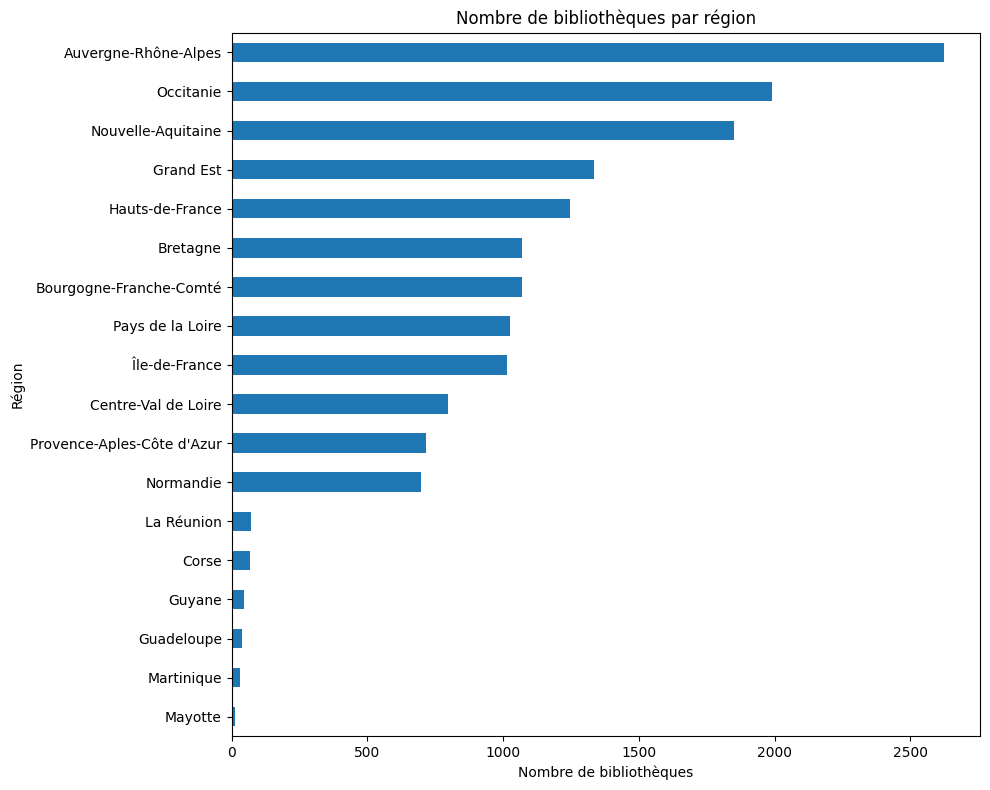

In [15]:
# Affichage du barplot horizontal
biblio_region_counts_sorted.plot(
    kind='barh',
    figsize=(10, 8),
    title="Nombre de bibliothèques par région"
)

plt.xlabel("Nombre de bibliothèques")
plt.ylabel("Région")
plt.gca().invert_yaxis()  # ✅ Inverser l'axe Y pour que les plus grandes soient en haut
plt.tight_layout()
plt.show()


In [8]:
df_clean = adresses_des_bibliotheques_publiques.dropna(subset=['Population commune']) # 96 lignes "Population commune" supprimées car vides

In [9]:
population_par_region = df_clean.groupby('Région')['Population commune'].sum().sort_values(ascending=False)
print(population_par_region)


Région
Île-de-France                 169566044.0
Auvergne-Rhône-Alpes           24219993.0
Provence-Aples-Côte d'Azur     21876098.0
Occitanie                      19478011.0
Nouvelle-Aquitaine             12381182.0
Pays de la Loire               11688107.0
Grand Est                      10882228.0
Hauts-de-France                 9930215.0
Bretagne                        8724311.0
Normandie                       7691060.0
Bourgogne-Franche-Comté         4876760.0
La Réunion                      4582081.0
Centre-Val de Loire             4220972.0
Corse                            756938.0
Guadeloupe                       623409.0
Guyane                           395479.0
Martinique                       341569.0
Mayotte                          225771.0
Name: Population commune, dtype: float64


In [10]:
# 1. Convertir les deux Series en DataFrames
df_biblio = biblio_region_counts.rename('Nombre de bibliothèques').reset_index()
df_biblio.columns = ['Région', 'Nombre de bibliothèques']

df_pop = population_par_region.rename('Population totale').reset_index()
df_pop.columns = ['Région', 'Population totale']

# 2. Fusionner les deux DataFrames sur la colonne 'Région'
regions_data = pd.merge(df_pop, df_biblio, on='Région')

# 3. Calcul du ratio : nombre d'habitants par bibliothèque
regions_data['Habitants par bibliothèque'] = regions_data['Population totale'] / regions_data['Nombre de bibliothèques']

# 4. Tri (optionnel)
regions_data_sorted = regions_data.sort_values(by='Habitants par bibliothèque')

# 5. Affichage
print(regions_data_sorted)


                        Région  Population totale  Nombre de bibliothèques  \
10     Bourgogne-Franche-Comté          4876760.0                     1069   
12         Centre-Val de Loire          4220972.0                      798   
4           Nouvelle-Aquitaine         12381182.0                     1852   
7              Hauts-de-France          9930215.0                     1246   
8                     Bretagne          8724311.0                     1070   
6                    Grand Est         10882228.0                     1334   
15                      Guyane           395479.0                       47   
1         Auvergne-Rhône-Alpes         24219993.0                     2625   
3                    Occitanie         19478011.0                     1991   
16                  Martinique           341569.0                       31   
9                    Normandie          7691060.0                      698   
5             Pays de la Loire         11688107.0               

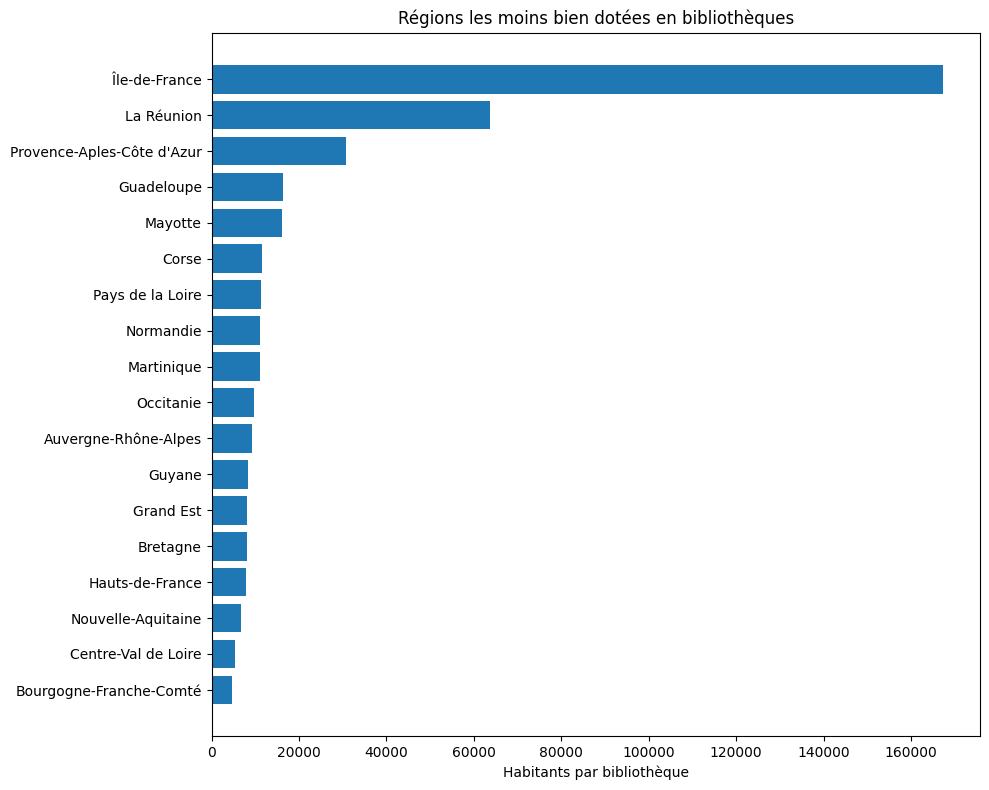

In [11]:
import matplotlib.pyplot as plt

# Trier par ratio décroissant (les plus "mal desservies" en haut)
regions_data_sorted = regions_data.sort_values(by='Habitants par bibliothèque', ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(regions_data_sorted['Région'], regions_data_sorted['Habitants par bibliothèque'])
plt.xlabel("Habitants par bibliothèque")
plt.title("Régions les moins bien dotées en bibliothèques")
plt.tight_layout()
plt.show()


In [12]:
df = adresses_des_bibliotheques_publiques.dropna(subset=['Latitude', 'Longitude', 'Région']) # retirer les lignes où les valeurs sont vides dans 'Latitude', 'Longitude' et 'Région'
regions = sorted(df['Région'].dropna().unique()) # liste des régions sans doublons, triée par ordre alphabétique

# Fonction : Si aucun point trouvé, on affiche un message et on sort
def afficher_carte_par_region(region_selectionnee):
    dff = df[df['Région'] == region_selectionnee]
    if dff.empty:
        print("Aucune donnée pour cette région.")
        return

    # On centre la carte sur le point médian (moyenne géographique des bibliothèques de la région) pour éviter d’avoir une carte mal centrée
    lat0, lon0 = dff['Latitude'].median(), dff['Longitude'].median()
    m = folium.Map(location=[lat0, lon0], zoom_start=7, tiles="OpenStreetMap") # zoom_start : niveau de zoom régional // tiles="OpenStreetMap" : style de fond de carte

    # On initialise un groupe MarkerCluster et on l’ajoute à la carte.
    cluster = MarkerCluster().add_to(m)

    # On parcourt chaque bibliothèque de la région sélectionnée et on ajoute un CircleMarker pour chaque point
    for _, row in dff.iterrows():
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=3, # rayon du cercle
            color='blue',
            fill=True,
            fill_opacity=0.7,
            popup=row.get('Code_bib', 'Inconnu') # Nom de la bibliothèque ou 'Inconnu' si non disponible
        ).add_to(cluster) # on ajoute le cercle au cluster

    display(m) # affiche la carte

# Création d'une liste déroulante interactive pour sélectionner la région
interact(
    afficher_carte_par_region,
    region_selectionnee=widgets.Dropdown(options=regions, description='Région :')
)



interactive(children=(Dropdown(description='Région :', options=('Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Com…

<function __main__.afficher_carte_par_region(region_selectionnee)>